<a href="https://colab.research.google.com/github/rutapsz/timo/blob/main/timo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №3
# Решение задачи линейной регрессии

1. Решить задачу регрессии на примере следующих данных:
x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,6.3654, 5.1301, 6.4296,
7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176,
22.203, 5.2524, 6.5894,9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836,
6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,11.7,
5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102,
9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,7.2182, 8.2951, 10.236, 5.4994,
20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274,
5.1077, 5.7292, 5.1884,6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204,
5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
y = [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987,
3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,3.6518,
5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692,
24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,4.1164, 3.3928, 10.117,
5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043,
1.0179, 6.7504, 1.8396, 4.2885, 4.9981,1.4233, -1.4211, 2.4756, 4.6042, 3.9624,
5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173,
20.992, 6.6799, 4.0259,1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526,
2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695,
0.152, 2.8214,1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705]

In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,6.3654, 5.1301, 6.4296,
7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176,
22.203, 5.2524, 6.5894,9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836,
6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,11.7,
5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102,
9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,7.2182, 8.2951, 10.236, 5.4994,
20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274,
5.1077, 5.7292, 5.1884,6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204,
5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
y = [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987,
3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,3.6518,
5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692,
24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,4.1164, 3.3928, 10.117,
5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043,
1.0179, 6.7504, 1.8396, 4.2885, 4.9981,1.4233, -1.4211, 2.4756, 4.6042, 3.9624,
5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173,
20.992, 6.6799, 4.0259,1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526,
2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695,
0.152, 2.8214,1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705]


x_mean = np.mean(x)
y_mean = np.mean(y)

beta1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
beta0 = y_mean - beta1 * x_mean

print(f"beta0: {beta0}")
print(f"beta1: {beta1}")

beta0: -3.8957808783118537
beta1: 1.193033644189594


2. Написать функцию, которая реализует численное решение задачи регрессии

In [32]:
import numpy as np

def linear_regression(x, y):
    x = np.array(x)
    y = np.array(y)

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    beta1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    beta0 = y_mean - beta1 * x_mean
    return beta0, beta1

beta0, beta1 = linear_regression(x, y)
print(f"beta0: {beta0}")
print(f"beta1: {beta1}")


beta0: -3.8957808783118537
beta1: 1.193033644189594


3. Построить график построенной модели.

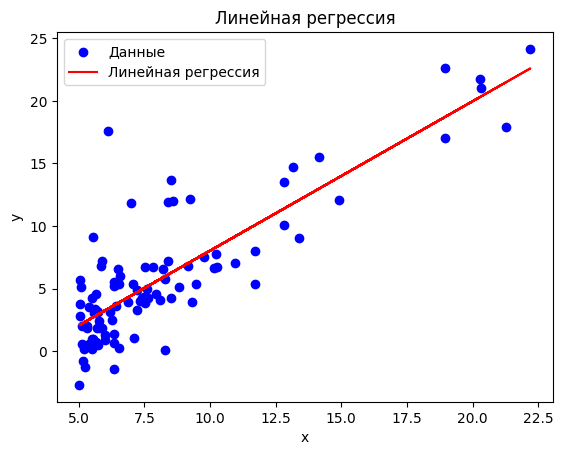

In [33]:
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, beta0 + beta1 * np.array(x), color='red', label='Линейная регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Линейная регрессия')
plt.show()


4. Сравнить результат численного решения с аналитическим

Численное решение: beta0 = -3.8957808783118537, beta1 = 1.193033644189594
Аналитическое решение: beta0 = -3.8957808783118555, beta1 = 1.1930336441895941


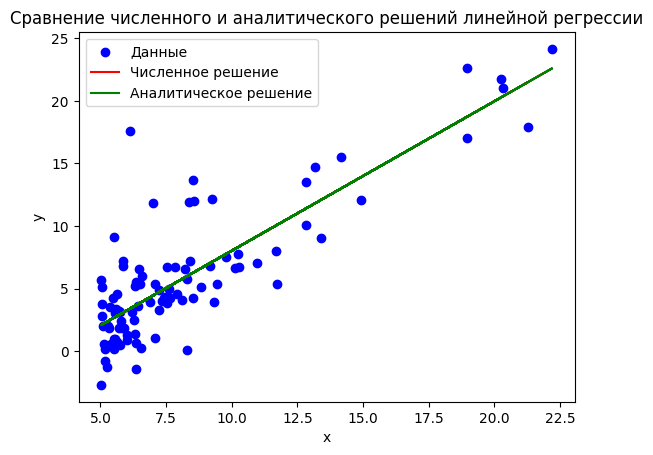

In [21]:
beta0_numerical, beta1_numerical = linear_regression(x, y)
print(f"Численное решение: beta0 = {beta0_numerical}, beta1 = {beta1_numerical}")

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"Аналитическое решение: beta0 = {intercept}, beta1 = {slope}")

plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, beta0_numerical + beta1_numerical * np.array(x), color='red', label='Численное решение')
plt.plot(x, intercept + slope * np.array(x), color='green', label='Аналитическое решение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение численного и аналитического решений линейной регрессии')
plt.show()


5. Решить задачу регрессии для структурированных данных. Повторов в группе
по выбору данных быть не должно. Данные взяты из датасета fetch_california_housing.

R^2 score: 0.5757877060324508


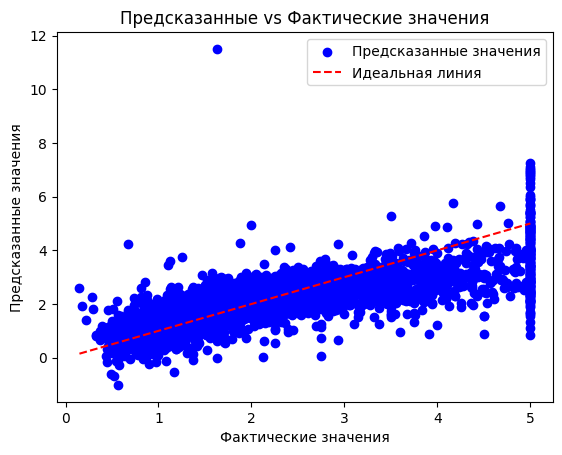

In [22]:
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target

data = data.drop_duplicates()

X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print(f"R^2 score: {score}")

plt.scatter(y_test, y_pred, color='blue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.title('Предсказанные vs Фактические значения')
plt.show()

6. Сравнить работу линейной регрессии с Lasso-регрессией и с Ridge-регрессией.

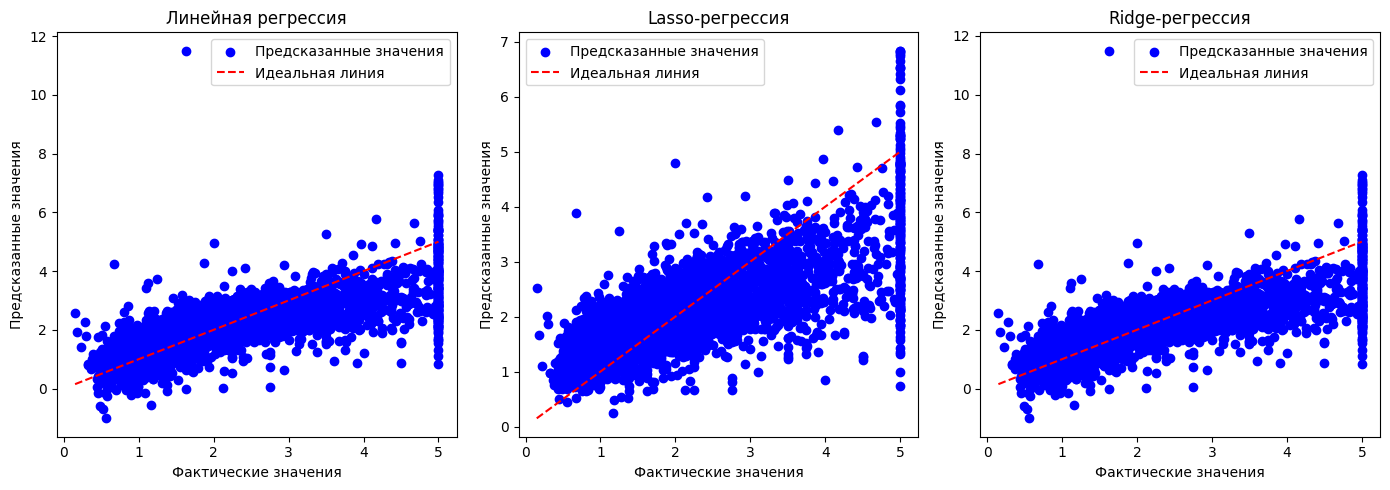

In [25]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.title('Линейная регрессия')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, color='blue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.title('Lasso-регрессия')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, color='blue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.title('Ridge-регрессия')

plt.tight_layout()
plt.show()

7. Вывести метрики оценки качества модели для задачи регрессии.

In [26]:
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} - R^2: {r2}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Linear Regression - R^2: 0.5757877060324508, MSE: 0.5558915986952444, RMSE: 0.7455813830127764, MAE: 0.5332001304956553
Lasso Regression - R^2: 0.5318167610318159, MSE: 0.6135115198058131, RMSE: 0.7832697618354822, MAE: 0.5816074623949868
Ridge Regression - R^2: 0.5757944553633934, MSE: 0.55588275431138, RMSE: 0.7455754517896763, MAE: 0.5332005104154317
